In [ ]:
# Import the necessary libraries
from tensorflow.keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Activation, Flatten, Dense, Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# One hot encode the y training and testing data
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [ ]:
# Scale the data
x_train = x_train /255.0
x_test = x_test /255.0

Martin Yap, Hoyun Yoon, ICP 10

Form the model with the given layer layout

In [ ]:
# Initialize model
model1 = Sequential()

# Define the layers to the model
model1.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Conv2D(32, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(128, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))
model1.add(Conv2D(128, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model1.add(Flatten())
model1.add(Dropout(0.2))

model1.add(Dense(1024))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Dense(10))
model1.add(Activation('softmax'))

In [ ]:
# Fit the model
model1.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model1.fit(x_train, y_train, batch_size=10, epochs=20, validation_split=0.2, shuffle=True)

Epoch 1/20
4000/4000 [==============================] - 468s 117ms/step - loss: 1.9973 - accuracy: 0.2643 - val_loss: 1.7833 - val_accuracy: 0.3809
Epoch 2/20
4000/4000 [==============================] - 496s 124ms/step - loss: 1.6135 - accuracy: 0.4119 - val_loss: 1.4839 - val_accuracy: 0.4732
Epoch 3/20
4000/4000 [==============================] - 471s 118ms/step - loss: 1.4291 - accuracy: 0.4811 - val_loss: 1.3287 - val_accuracy: 0.5237
Epoch 4/20
4000/4000 [==============================] - 468s 117ms/step - loss: 1.3109 - accuracy: 0.5284 - val_loss: 1.2512 - val_accuracy: 0.5523
Epoch 5/20
4000/4000 [==============================] - 475s 119ms/step - loss: 1.2033 - accuracy: 0.5671 - val_loss: 1.1344 - val_accuracy: 0.5941
Epoch 6/20
4000/4000 [==============================] - 480s 120ms/step - loss: 1.1045 - accuracy: 0.6051 - val_loss: 1.0296 - val_accuracy: 0.6371
Epoch 7/20
4000/4000 [==============================] - 483s 121ms/step - loss: 1.0156 - accuracy: 0.6370 - val_

In [ ]:
# Evaluate the model
score1 = model1.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

313/313 [==============================] - 23s 72ms/step - loss: 0.6934 - accuracy: 0.7738
Test loss: 0.6934332251548767
Test accuracy: 0.7738000154495239


In [ ]:
# Save model
model1.save('./model1'+'.h5')

1) Change the model into a Functional API model

In [ ]:
# Form the functional API model using the same settings as the sequential model
input_layer = Input(shape=(32, 32, 3))
conv1 = Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
drop1 = Dropout(0.2)(conv1)
conv2 = Conv2D(32, (3,3), activation='relu', padding='same')(drop1)
max1 = MaxPooling2D(pool_size=(2,2))(conv2)

conv3 = Conv2D(64, (3,3), activation='relu', padding='same')(max1)
drop2 = Dropout(0.2)(conv3)
conv4 = Conv2D(64, (3,3), activation='relu', padding='same')(drop2)
max2 = MaxPooling2D(pool_size=(2,2))(conv4)

conv5 = Conv2D(128, (3,3), activation='relu', padding='same')(max2)
drop3 = Dropout(0.2)(conv5)
conv6 = Conv2D(128, (3,3), activation='relu', padding='same')(drop3)
max3 = MaxPooling2D(pool_size=(2,2))(conv6)

flat = Flatten()(max3)
drop4 = Dropout(0.2)(flat)
den1 = Dense(1024, activation='relu')(drop4)
drop5 = Dropout(0.2)(den1)
den2 = Dense(512, activation='relu')(drop5)
drop6 = Dropout(0.2)(den2)
out_layer = Dense(10, activation='softmax')(drop6)

In [ ]:
# Create the model by specifying the input and output in the layers
model2 = keras.Model(inputs=input_layer, outputs=out_layer, name="functional_model")

In [ ]:
# Compile the model with the loss, optimizer, and metrics used in the sequential model
model2.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Fit the data to the model
model2.fit(x_train, y_train, batch_size=10, epochs=20, validation_split=0.2, shuffle=True)

Epoch 1/20
4000/4000 [==============================] - 477s 119ms/step - loss: 2.0311 - accuracy: 0.2508 - val_loss: 1.7584 - val_accuracy: 0.3676
Epoch 2/20
4000/4000 [==============================] - 472s 118ms/step - loss: 1.6388 - accuracy: 0.4010 - val_loss: 1.5544 - val_accuracy: 0.4464
Epoch 3/20
4000/4000 [==============================] - 479s 120ms/step - loss: 1.4435 - accuracy: 0.4775 - val_loss: 1.3971 - val_accuracy: 0.4877
Epoch 4/20
4000/4000 [==============================] - 486s 122ms/step - loss: 1.3011 - accuracy: 0.5306 - val_loss: 1.1931 - val_accuracy: 0.5748
Epoch 5/20
4000/4000 [==============================] - 487s 122ms/step - loss: 1.1790 - accuracy: 0.5749 - val_loss: 1.0739 - val_accuracy: 0.6174
Epoch 6/20
4000/4000 [==============================] - 494s 124ms/step - loss: 1.0710 - accuracy: 0.6176 - val_loss: 0.9945 - val_accuracy: 0.6489
Epoch 7/20
4000/4000 [==============================] - 494s 123ms/step - loss: 0.9828 - accuracy: 0.6514 - val_

In [ ]:
# Evaluate the model
score2 = model2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

313/313 [==============================] - 23s 72ms/step - loss: 0.6848 - accuracy: 0.7769
Test loss: 0.6848118901252747
Test accuracy: 0.7768999934196472


Comparing the performaces of the sequential and functional models, we can see that the two models are close to the same with the functional model having a slightly higher accuracy and lower loss.

In [ ]:
# Save model
model2.save('./model2'+'.h5')

2) Apply the specified callbacks to the model

In [ ]:
# Load the model
model2 = keras.models.load_model('/content/model2.h5')

In [ ]:
# Apply the ModelCheckPoint callback
mcp = keras.callbacks.ModelCheckpoint(filepath='/content/checkpoint', monitor='val_loss',verbose=0,
                                      save_best_only=False, save_weights_only=False, mode='auto')

In [ ]:
# Apply the ReduceLROnPlateau callback
rlp = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

In [ ]:
# Apply the EarlyStopping callback using the restore_best_weights parameter
es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, 
                                   verbose=0, mode='auto', baseline=None, 
                                   restore_best_weights=True)

In [ ]:
# Store all the callbacks into a list
callbacks = [mcp, rlp, es]

In [ ]:
# Fit the model with the callbacks
model2.fit(x_train, y_train, epochs=10, validation_split=0.2, 
           shuffle=True, callbacks=callbacks)

Epoch 1/10
1250/1250 [==============================] - 362s 289ms/step - loss: 0.2826 - accuracy: 0.8999 - val_loss: 0.6304 - val_accuracy: 0.8010 - lr: 0.0100
Epoch 2/10
1250/1250 [==============================] - 360s 288ms/step - loss: 0.2482 - accuracy: 0.9097 - val_loss: 0.6596 - val_accuracy: 0.7976 - lr: 0.0100


3) Save the model

In [ ]:
# Save model
model2.save('./model2_withCallbacks'+'.h5')

In [ ]:
# Create a zip file for the checkpoint folder
!zip -r /content/checkpoint_files.zip /content/checkpoint

  adding: content/checkpoint/ (stored 0%)
  adding: content/checkpoint/saved_model.pb (deflated 90%)
  adding: content/checkpoint/assets/ (stored 0%)
  adding: content/checkpoint/variables/ (stored 0%)
  adding: content/checkpoint/variables/variables.index (deflated 61%)
  adding: content/checkpoint/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/checkpoint/keras_metadata.pb (deflated 93%)


4) Predict first 4 images of test data and print the actual labels

In [ ]:
# Load the model
model2_reload = keras.models.load_model('/content/model2_withCallbacks.h5')

In [ ]:
# Predict the first 4 images
pred = model2_reload.predict(x_test[0:4, :])
classes = np.argmax(pred, axis = 1)

In [ ]:
# Show what the model predicted
print("The model identified the images to belong to classes {}.".format(classes))

The model identified the images to belong to classes [3 8 8 0].


Text(0.5, 1.0, 'Ground Truth: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]')

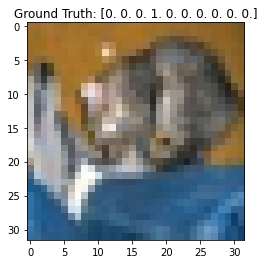

In [ ]:
# Display and label first image
plt.imshow(x_test[0])
plt.title('Ground Truth: {}'.format(y_test[0]))

Text(0.5, 1.0, 'Ground Truth: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]')

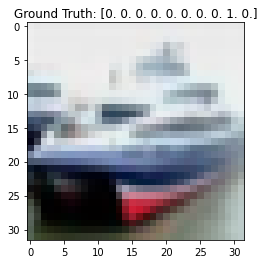

In [ ]:
# Display and label second image
plt.imshow(x_test[1])
plt.title('Ground Truth: {}'.format(y_test[1]))

Text(0.5, 1.0, 'Ground Truth: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]')

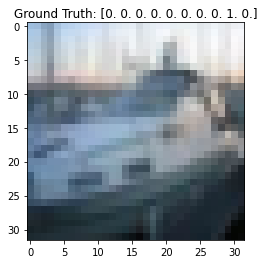

In [ ]:
# Display and label third image
plt.imshow(x_test[2])
plt.title('Ground Truth: {}'.format(y_test[2]))

Text(0.5, 1.0, 'Ground Truth: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]')

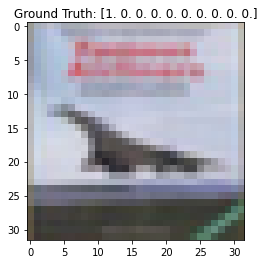

In [ ]:
# Display and label fourth image
plt.imshow(x_test[3])
plt.title('Ground Truth: {}'.format(y_test[3]))

Looking at the actual labels and those predicted by the model, we can see that the model was able to correctly predict what classes the images belonged to.

5) Train model with own dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define the shape for the images and the paths for the datasets
SHAPE = (32, 32)
test_path = '/content/drive/MyDrive/5590ICP10dataset/Test'
train_path = '/content/drive/MyDrive/5590ICP10dataset/Train'

In [ ]:
# Define parameters for the image data generator
datagen_kwargs = dict(rescale=1./255)

# Obtain the testing dataset
valid_datagen = keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_gen = valid_datagen.flow_from_directory(test_path, shuffle=True, target_size=SHAPE, class_mode='categorical')

Found 20 images belonging to 10 classes.


In [ ]:
# Split the generator into image and label variables
img_val, label_val = next(iter(valid_gen))

# Display the shapes of the image and label variables
print("Image shape:", img_val.shape)
print("Label shape:", label_val.shape)

Image shape: (20, 32, 32, 3)
Label shape: (20, 10)


In [ ]:
# Obtain the training dataset
train_datagen = keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_gen = valid_datagen.flow_from_directory(train_path, shuffle=True, target_size=SHAPE, class_mode='categorical')

Found 80 images belonging to 10 classes.


In [ ]:
# Split the generator into image and label variables
img_train, label_train = next(iter(train_gen))

# Display the shapes of the image and label variables
print("Image shape:", img_train.shape)
print("Label shape:", label_train.shape)
dataset_labels = sorted(train_gen.class_indices.items(), key=lambda pair:pair[1])

# Extract the labels of the images
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Image shape: (32, 32, 32, 3)
Label shape: (32, 10)
['Bike' 'Boat' 'Bus' 'Car' 'Helicopter' 'Locomotive' 'Motorcycle' 'Plane'
 'Scooter' 'Truck']


In [ ]:
# Compile the model with the loss, optimizer, and metrics used in the sequential model
model2_reload.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Fit the data to the model
history = model2_reload.fit(img_train, label_train, epochs=40, verbose=1,
                            validation_data=(img_val, label_val),
                            shuffle=True)

Epoch 1/40
1/1 [==============================] - 1s 1s/step - loss: 13.8928 - accuracy: 0.0938 - val_loss: 7.7680 - val_accuracy: 0.2500
Epoch 2/40
1/1 [==============================] - 0s 333ms/step - loss: 6.6418 - accuracy: 0.1875 - val_loss: 4.7194 - val_accuracy: 0.2000
Epoch 3/40
1/1 [==============================] - 0s 346ms/step - loss: 3.4077 - accuracy: 0.1250 - val_loss: 4.3507 - val_accuracy: 0.2500
Epoch 4/40
1/1 [==============================] - 0s 334ms/step - loss: 2.3184 - accuracy: 0.2812 - val_loss: 4.1056 - val_accuracy: 0.2500
Epoch 5/40
1/1 [==============================] - 0s 334ms/step - loss: 2.1056 - accuracy: 0.4375 - val_loss: 4.0365 - val_accuracy: 0.3000
Epoch 6/40
1/1 [==============================] - 0s 342ms/step - loss: 1.9839 - accuracy: 0.2812 - val_loss: 3.8861 - val_accuracy: 0.3000
Epoch 7/40
1/1 [==============================] - 0s 348ms/step - loss: 1.6661 - accuracy: 0.5000 - val_loss: 3.8139 - val_accuracy: 0.3000
Epoch 8/40
1/1 [======

Plot training and validation accuracy

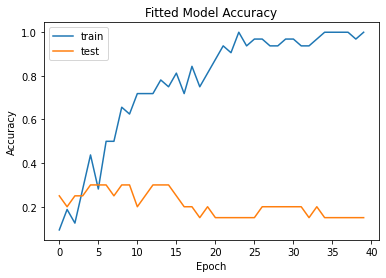

In [ ]:
#Plot the accuracies of the training and testing datasets from the history object
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

#Modify the graph to have the correct labels
plt.title('Fitted Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

Save model and predict on test data

In [ ]:
# Save model
model2_reload.save('./model2_withCustomData'+'.h5')

In [ ]:
# Load the model
model2_custom = keras.models.load_model('/content/model2_withCustomData.h5')

In [ ]:
# Predict the classes for the test data
pred = model2_custom.predict(img_val)
classes = np.argmax(pred, axis = 1)

In [ ]:
# Display the predictions
print(classes)

# Redisplay the labels for the dataset
print(dataset_labels)

[4 7 1 0 4 5 9 8 8 3 6 7 7 9 1 6 3 7 0 4]
['Bike' 'Boat' 'Bus' 'Car' 'Helicopter' 'Locomotive' 'Motorcycle' 'Plane'
 'Scooter' 'Truck']


Text(0.5, 1.0, 'Ground Truth: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]')

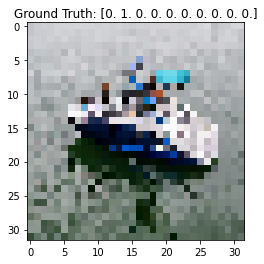

In [ ]:
# Display image and actual label
plt.imshow(img_val[0])
plt.title('Ground Truth: {}'.format(label_val[0]))

Text(0.5, 1.0, 'Ground Truth: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]')

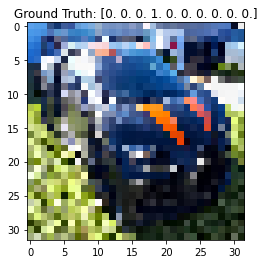

In [ ]:
# Display image and actual label
plt.imshow(img_val[1])
plt.title('Ground Truth: {}'.format(label_val[1]))

Text(0.5, 1.0, 'Ground Truth: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]')

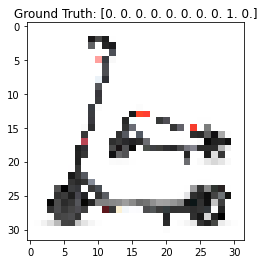

In [ ]:
# Display image and actual label
plt.imshow(img_val[7])
plt.title('Ground Truth: {}'.format(label_val[7]))

Text(0.5, 1.0, 'Ground Truth: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]')

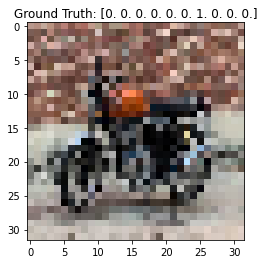

In [ ]:
# Display image and actual label
plt.imshow(img_val[10])
plt.title('Ground Truth: {}'.format(label_val[10]))

Text(0.5, 1.0, 'Ground Truth: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]')

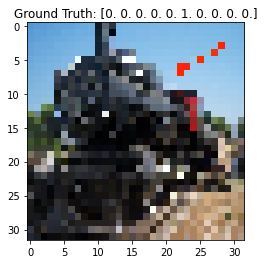

In [ ]:
# Display image and actual label
plt.imshow(img_val[18])
plt.title('Ground Truth: {}'.format(label_val[18]))

Text(0.5, 1.0, 'Ground Truth: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]')

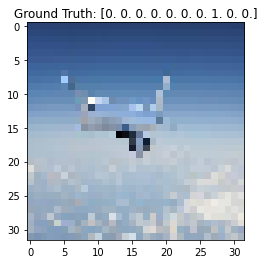

In [ ]:
# Display image and actual label
plt.imshow(img_val[19])
plt.title('Ground Truth: {}'.format(label_val[19]))